<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Detected-with-YOLO--Schreibtisch-mit-Objekten.jpg/1280px-Detected-with-YOLO--Schreibtisch-mit-Objekten.jpg" width="90%"> 

<img src="https://gitcdn.xyz/cdn/Tony607/blog_statics/aa67195320e614e32bba164ce75f780337cbf060/images/object-detection/custom_detection.png" width="90%"> 

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/OD.png" width="90%"> 

<img src="http://www.cs.cmu.edu/~tmalisie/projects/iccv11/person_priming-01.jpg" width="90%"> 

<img src="https://www.learnopencv.com/wp-content/uploads/2016/11/image-classification-pipeline.jpg" width="90%"> 

In [1]:
%matplotlib inline
import cv2
import numpy as np 

In [2]:
# 加載圖像  " imread " Load an image 指定圖像路徑的 
input = cv2.imread('./data/input.jpg')

#  ' input.jpg ' 文件 名
#  

# 圖像變量，使用 'imshow' 
# 第一個參數 是 圖像窗口  image window 中 顯示的標題  title
# 第二個參數 是 圖像變量
cv2.imshow('Hello Computer Vision ', input)

#  WaitKey '允許 在圖像窗口 打開時 輸入信息
#  leaving it blank 留空是等待之前  按下任何鍵 Continuous
#  放置數字 0 , 除外可以 指定 延遲
#  保持 窗口 打開多長時間(這時間以毫秒為單位) 
#  (time is in milliseconds )
cv2.waitKey()

# 關閉所有打開的窗口
# 未能放置此program 將導致程序 hang up 

cv2.destroyAllWindows()

In [3]:
# print 圖像的每個 維度

print(('Height of Image:')  , int(input.shape[0]), 'pixels')
print(('Width of Image: ')  , int(input.shape[1]), 'pixels')
print(('Channel of Image: '), int(input.shape[2]),'Channels')

Height of Image: 830 pixels
Width of Image:  1245 pixels
Channel of Image:  3 Channels


In [4]:
# 使用 imwrite 指定文件名 和  保存的圖像

cv2.imwrite('data/input.jpg', input)

True

In [5]:
image = cv2.imread('./data/burano.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image', hsv_image)

#  x-y Dimensionen 頻道 x-y Dimensionen Channel

cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
image = cv2.imread('./data/burano.jpg')

# OpenCV 的 " split 分割 " 功能= 將圖像分成每個顏色索引 color index
B, G, R = cv2.split(image)

print (image.shape)
print (B.shape)
cv2.imshow("burano",image)
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 重新 製作 - 原始圖像 original image, 
# merged = cv2.merge([B,G,R]) 
# cv2.imshow("Merged", merged) 

# 放大藍色 amplify the blue color 
# merged = cv2.merge([B+100, G, R])
# cv2.imshow("Merged with Blue Amplified", merged) 

# cv2.waitKey(0)

(181, 279, 3)
(181, 279)


In [7]:
import cv2
import numpy as np

B, G, R = cv2.split(image)

# 創建一個 零矩陣  - matrix of zeros 
# 圖像尺寸 h x w  - dimensions of the image h x w 

zeros = np.zeros(image.shape[:2], dtype = "uint8")
ones = np.ones(image.shape[:2], dtype = "uint8")*200

cv2.imshow("burano", image)
cv2.imshow("ones", cv2.merge([zeros, zeros, ones]))
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()

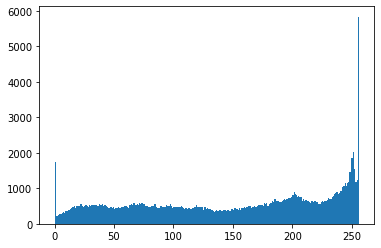

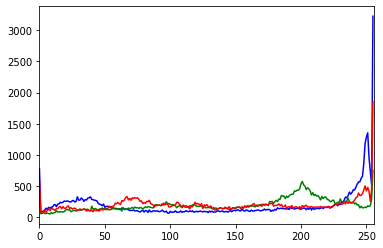

In [8]:

# 導入 matplotlib 來 創建直方圖  - histogram 
from matplotlib import pyplot as plt

image = cv2.imread('data/burano.jpg')


# histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# 繪製 直方圖，ravel（）將 2-dim 圖像 - flatens為 - 1-dim 數組 array 

plt.hist(image.ravel(), 256, [0, 256]);
plt.show()

# Viewing 單獨的顏色通道 - Separate Color Channels

color = ('b', 'g', 'r')

# 顏色分開並在直方圖中繪製 每個顏色 

for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].



In [9]:
image = cv2.imread('data/tobago.jpg')
cv2.imshow("Tobago", image) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

# 創建一個黑色圖像

image = np.zeros((512,512,3), np.uint8)

# 創建 黑白製作嗎
image_bw = np.zeros((512,512), np.uint8)

cv2.imshow("Black Rectangle (Color)", image)
cv2.imshow("Black Rectangle (B&W)", image_bw)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 繪製 thickness 為5 像素的對角藍線 - diagonal blue line 

image = np.zeros((512,512,3), np.uint8)

#cv2.line(image, (startposition), (endposition), (Farbe der Linie), Linienbreite)

cv2.line(image, (0,0), (511,511), (255,127,0), 5)
cv2.line(image, (511,0), (0,511), (255,127,0), 5)
cv2.imshow("Blue Line", image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# 畫一個矩形 rectangle

image = np.zeros((512,512,3), np.uint8)

#  cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

cv2.rectangle(image, (100,100), (300,250), (127,50,127), -1)
cv2.imshow("Rectangle", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
image = np.zeros((512,512,3), np.uint8)

#cv2.circle(image, (Zentrum), Radius, (15,75,50), -1) 

cv2.circle(image, (350, 350), 100, (15,75,50), 10) 
cv2.imshow("Circle", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
image = np.zeros((512,512,3), np.uint8)

# 定義 四點
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

print (pts.shape)
# reshape 折線所需的形式 重塑我們的  polylines

pts = pts.reshape((-1,1,2))
print (pts.shape)

cv2.polylines(image, [pts], True, (0,0,255), 3)
cv2.imshow("Polygon", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(4, 2)
(4, 1, 2)


### 添加文字 add with cv2.putText

cv2.putText(image, '文字 to Display', bottom left starting point, Font, Font Size, Color, Thickness)

- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

In [15]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello World!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
cv2.imshow("Hello Computer Vision!", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

image = cv2.imread('data/input.jpg')
cv2.imshow('Original', image)

# Create our shapening kernel - 創建 shapening 內核
# 因為我們沒有規範化 normalize  , 矩陣中的值 sum to 1 

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# input image - 不同的內核應用

sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2.imshow('Image Sharpening', sharpened)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2
import numpy as np

# Load our image as greyscale 
image = cv2.imread('data/gradient.jpg',0)
cv2.imshow('Original', image)

# 低於127的值變為0（黑色，上面的所有內容都變為255（白色）
# Values below 127 goes to 0 (black, everything above goes to 255 (white)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# 127以下的值變為255，127以上的值變為0（與上面相反）
# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)

ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)

# 高於127的值被截斷（保持）在127（255參數未使用）
# Values above 127 are truncated (held) at 127 (the 255 argument is unused)

ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)

# #127以下的值為0，127以上的值不變
# Values below 127 go to 0, above 127 are unchanged  

ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)


# 保留在上面，低於127不變，高於127變為0
# Resever of above, below 127 is unchanged, above 127 goes to 0

ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

# Load 加載 圖像 
image = cv2.imread('data/Origin_of_Species.jpg', 0)

cv2.imshow('Original', image)
cv2.waitKey(0) 

#  127以下的值變為0（黑色，上面的所有內容都變為255（白色）
#  Values below 127 goes to 0 (black, everything above goes to 255 (white)


ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0) 

# 在 消除噪點時模糊圖像 是一種很好的做法
# It's good practice to blur images as it removes noise


image = cv2.GaussianBlur(image, (3, 3), 0)

# ＃使用adaptiveThreshold
# Using adaptiveThreshold

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

# Otsu's  高斯濾波後的 閾值處理
# Otsu's thresholding after Gaussian filtering


blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

cv2.destroyAllWindows()

In [21]:
import cv2
import numpy as np

image = cv2.imread('data/opencv_inv.png', 0)

cv2.imshow('Original', image)
cv2.waitKey(0)

# 定義 內核大小
# define our kernel size


kernel = np.ones((5,5), np.uint8)


# 侵蝕 做法
# using - erode


erosion = cv2.erode(image, kernel, iterations = 1)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2.imshow('Dilation', dilation)
cv2.waitKey(0)


# MORPH_OPEN 有助於 消除噪音
# MORPH_OPEN  - Good for removing noise


opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opening', opening)
cv2.waitKey(0)

# MORPH_CLOSE  - 有助於消除噪音
# MORPH_CLOSE  - Good for removing noise


closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closing', closing)
cv2.waitKey(0)


cv2.destroyAllWindows()

In [22]:
import cv2
import numpy as np

image = cv2.imread('data/input.jpg',0)

height, width = image.shape

# 提取 Sobel 邊緣 
# Extract Sobel Edges

sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.imshow('Sobel X', sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel_OR', sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)

# 需要提供兩個值：threshold1 和 threshold2 - 
# 任何大於threshold2的梯度值
# 被認為是一個優勢 
# 任何低於threshold1的值都被認為不是邊緣
# threshold1和threshold2之間
# Values基於 方式 - 被分類為邊緣或非邊緣
# intensities是“連接”的
# 在這種情況下- 任何低於60的梯度值都 被視為非邊緣
# 120以上 - 的任何值都被視為邊緣

# Canny邊緣檢測 - 使用梯度值 作為 閾值
# Canny Edge Detection uses gradient values as thresholds

# 第一個閾值 梯度
# The first threshold gradient


canny = cv2.Canny(image, 50, 120)
cv2.imshow('Canny', canny)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('data/scan.jpg')

cv2.imshow('Original', image)
cv2.waitKey(0)

# 原始圖像的 4個角 的 坐標
# Cordinates of the 4 corners of the original image

points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# 輸出的 4個角 的 坐標 Cordinates
# A4紙 - 1：1.41 的 比例 

points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# 兩組 四個點 進行計算 
# 透視轉換矩陣，M -  Perspective Transformation matrix, M 

M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('data/ex2.jpg')
rows,cols,ch = image.shape

cv2.imshow('Original', image)
cv2.waitKey(0)

# 原始圖像的 4個角 的 坐標
# Cordinates of the 4 corners of the original image

points_A = np.float32([[320,15], [700,215], [85,610]])

# 輸出的 4個角 的 坐標 Cordinates
# A4紙 - 1：1.41 的 比例 

points_B = np.float32([[0,0], [420,0], [0,594]])
 
    
    
# 兩組 四個點 進行計算 
# 透視轉換矩陣，M -  Perspective Transformation matrix, M 


M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="https://www.learnopencv.com/wp-content/uploads/2016/11/gradient-kernels.jpg" width="25%"> 

<img src="https://www.learnopencv.com/wp-content/ql-cache/quicklatex.com-63f6cd0dabced613d560b807221f8527_l3.png" width="25%"> 

<img src="https://www.learnopencv.com/wp-content/uploads/2016/11/SVM.jpg" width="50%"> 

In [2]:
import cv2
import numpy as np

# 草圖生成功能 sketch generating function

def sketch(image):
    # Convert 圖像 轉換為 灰度 
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 高斯模糊 Guassian Blur 清理圖像  image
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    
    # 提取邊緣  edges
    canny_edges = cv2.Canny(img_gray_blur, 10, 70)
    
    # 反轉 二值化圖像 invert binarize the image 
    ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask


# Initialize webcam，cap是 VideoCapture提供的對象
# 包含一個布爾值 (True , False )，是否成功（ret）
# 包含從網絡攝像頭 (frame)- 收集的圖像


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow(' WebCam Sketcher - Live ', sketch(frame))
    if cv2.waitKey(1) == 13: # 13 is the Enter Key
        break
        
# 釋放相機並關閉窗戶

cap.release()
cv2.destroyAllWindows()      